# 機械学習体験 - 教師あり学習 - 分類問題

## 例題1 - ロジスティック回帰

次の売上データ（不動産の購入データ）について考えてみましょう。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sales_df = pd.DataFrame({
    "buy" : [0, 1, 0, 1, 0],
    "age": [25, 35, 28, 40, 32]
})
sales_df

,buy,age
0,0,25
1,1,35
2,0,28
3,1,40
4,0,32


> `buy` が目的変数、 `age` が説明変数です。`buy` の値が `1` のものは`購入`、 `0` のものは`非購入` を意味します。 単純なケースですが、年齢（`age`） から 購入（`buy`） を予測するモデルを作成します。

### ロジスティック回帰

* ロジスティック回帰（ `LogisticRegression` ）は2値分類に利用できる
* 線形回帰式にロジスティック関数（`1 / (1 + exp(-x))`）を適用する
* ロジスティック回帰によって定義したモデルは 0〜1の範囲の結果（パーセンテージ）を返す

> 結果が0.5以上の場合は真、0.5より下回る場合は偽のように、2値分類に利用できます。

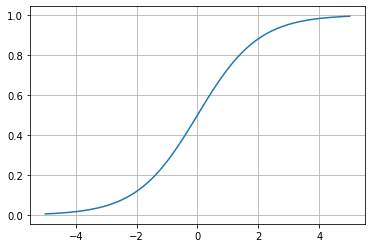

In [2]:
def logistic(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5.1, 0.1)
y = logistic(x)

plt.grid()
plt.plot(x, y)
plt.show()

#### ロジスティック関数

* `x` が `0` のとき `y`は `0.5` となる
* `x` が大きくなると `y` は `1` に近づく
* `x` が小さくなると `y` は `-1` に近づく

> ロジスティック関数はニューラルネットワーク（ディープラーニング）の文脈ではシグモイド関数と呼ばれることもある

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(sales_df["age"].values.reshape(-1, 1), sales_df["buy"].values) # 学習

print("coef_:", clf.coef_)
print("intercept_:", clf.intercept_)

coef_: [[0.80275059]]
intercept_: [-26.91273974]


> ロジスティック回帰は、線形回帰と同様に、学習によって係数、切片を算出する `y = logistic(a * x + b)`

In [4]:
x = np.arange(30, 40).reshape(-1, 1)
y = clf.predict(x)  # 推論
proba_y = clf.predict_proba(x)  # 推論（確率）
print("x:", x.reshape(-1))
print("y:", y.reshape(-1))
print("proba_y:", proba_y)

x: [30 31 32 33 34 35 36 37 38 39]
y: [0 0 0 0 1 1 1 1 1 1]
proba_y: [[0.94428728 0.05571272]
 [0.88365136 0.11634864]
 [0.77289325 0.22710675]
 [0.6039546  0.3960454 ]
 [0.40593868 0.59406132]
 [0.2344179  0.7655821 ]
 [0.12065081 0.87934919]
 [0.05791974 0.94208026]
 [0.02681056 0.97318944]
 [0.01219411 0.98780589]]


> 学習済みのモデルで推論できる。`predict_proba` メソッドを使うと確率のまま出力できる

In [5]:
my_x = 34
print(clf.predict_proba([[my_x]]))

my_y = logistic(clf.coef_[0] * my_x + clf.intercept_)
print(my_y)

[[0.40593868 0.59406132]]
[0.59406132]


## 例題2 - k-NN法（k近傍法）

次の売上データ（不動産の購入データ）について考えてみましょう。

In [6]:
import numpy as np
import pandas as pd

sales_df = pd.DataFrame({
    "buy" : [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    "age": [25, 35, 28, 40, 32, 30, 31, 34, 36, 38],
    "family": [2, 4, 2, 3, 3, 3, 4, 4, 3, 2]
})
sales_df

,buy,age,family
0,0,25,2
1,1,35,4
2,0,28,2
3,1,40,3
4,0,32,3
5,0,30,3
6,1,31,4
7,0,34,4
8,1,36,3
9,1,38,2


> `buy` が目的変数、 `age` が `family` が説明変数です。`buy` の値が `1` のものは`購入`、 `0` のものは`非購入` を意味します。 年齢（`age`）、 家族数（`family`） から 購入（`buy`） を予測するモデルを作成します。

### k-NN法

* k-NN法は最寄りのデータとの距離によって分類する
* 最寄りの1点からデータを分類したり、3点からデータを分類したりできる
* 非線形な分離が可能

> 一般的に距離の算出にはユークリッド距離を使います。データ間の距離を扱うアルゴリズムではデータの単位に注意が必要です。


In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(sales_df[["age", "family"]], sales_df["buy"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

> `KNeighborsClassifier(n_neighbors=1)` のようにコンストラクタ引数で、最寄りのいくつの点から分類を行うかを決定します。

[0]


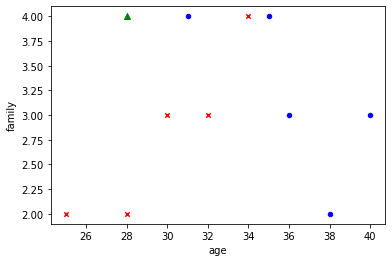

In [8]:
samples = [28,  4]
print(clf.predict([samples]))

ax = sales_df[sales_df["buy"]==0].plot.scatter("age", "family", marker="x", color="red")
sales_df[sales_df["buy"]==1].plot.scatter("age", "family",  marker="o", color="blue", ax=ax)
ax.scatter(samples[0], samples[1], marker="^", color="green")

> 学習済みのモデルで `[28, 4]` というデータを推論すると `0` ：未購入となります。
> 散布図では 青丸（ `1` ：購入）が近いように見えます。

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sales_df["scaled_age"] = sc.fit_transform(sales_df["age"].values.reshape(-1,1))
sales_df["scaled_family"] = sc.fit_transform(sales_df["family"].values.reshape(-1,1))
sales_df

,buy,age,family,scaled_age,scaled_family
0,0,25,2,-1.808107,-1.290994
1,1,35,4,0.480636,1.290994
2,0,28,2,-1.121484,-1.290994
3,1,40,3,1.625008,0.000000
4,0,32,3,-0.205987,0.000000
5,0,30,3,-0.663735,0.000000
6,1,31,4,-0.434861,1.290994
7,0,34,4,0.251762,1.290994
8,1,36,3,0.709510,0.000000
9,1,38,2,1.167259,-1.290994


> `StandardScaler` 　によってデータを標準化（Z-スコア化）しています。 `z = (x - mean) / std`

In [10]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(sales_df[["scaled_age", "scaled_family"]], sales_df["buy"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

> 標準化したデータで再度、学習します。

[1]


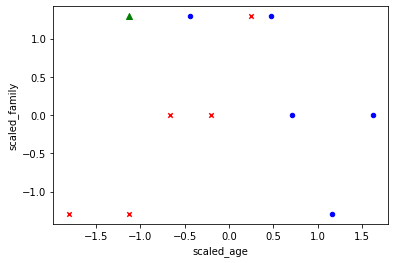

In [11]:
samples = [-1.121484,  1.290994] # 28, 4
print(clf.predict([samples]))

ax = sales_df[sales_df["buy"]==0].plot.scatter("scaled_age", "scaled_family", marker="x", color="red")
sales_df[sales_df["buy"]==1].plot.scatter("scaled_age", "scaled_family",  marker="o", color="blue", ax=ax)
ax.scatter(samples[0], samples[1], marker="^", color="green")

> `[-1.121484,  1.290994] # 28, 4` を示すデータは 1 ：購入となります。 

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


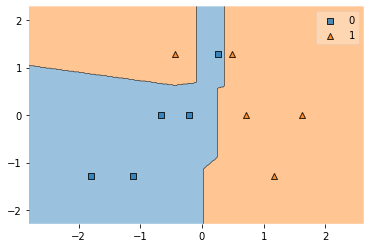

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(sales_df[["scaled_age", "scaled_family"]].values, sales_df["buy"].values, clf=clf)

> `mlxtend` というライブラリを使うと分類モデルの推論した境界線を表示できます。

## 例題3 - 分類問題の評価測定

sklearn を使ってサンプルデータを生成します。

In [13]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=8,
                  n_samples=500, 
                  n_features=2, 
                  cluster_std=1.5,
                  centers=2,
                  center_box=(0, 10)
                  )

df = pd.DataFrame(x, columns=["w", "h"])
df["answer"] = y
df

,w,h,answer
0,7.008658,4.920822,1
1,8.781190,9.958301,0
2,9.540405,9.930013,0
3,8.659880,8.513604,0
4,10.203574,7.244540,1
...,...,...,...
495,9.429335,8.372609,0
496,9.814982,11.514625,0
497,8.999855,7.984196,0
498,10.670994,9.323154,0


> make_blobs 以外にも サンプルデータ生成用のユーティリティが用意されています。 https://scikit-learn.org/stable/modules/classes.html#samples-generator

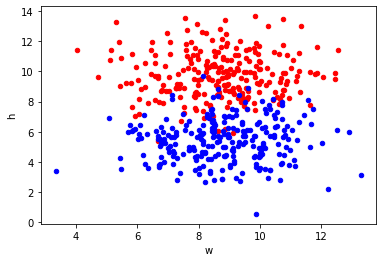

In [14]:
ax = df[df["answer"] == 0].plot.scatter("w", "h", color="red")
df[df["answer"] == 1].plot.scatter("w", "h", ax=ax, color="blue")

> 散布図を描画します。

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[["w", "h"]].values, df["answer"].values, random_state = 8)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


> train_test_split で訓練データとテストデータを分割します。

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)

print("p:", clf.predict(x_test)[:30])
print("a:", y_test[:30])

p: [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0]
a: [0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0]


> 推論値と期待値を比較しています。

In [17]:
print("Accuracy:", clf.score(x_test, y_test))

Accuracy: 0.888


> 分類問題の場合はscoreメソッドで正答率（Accuracy） を表示できます。

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(x_test))
pd.DataFrame(cm)

,0,1
0,55,10
1,4,56


> 混同行列（confusion matrix）という評価方法もあります。

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


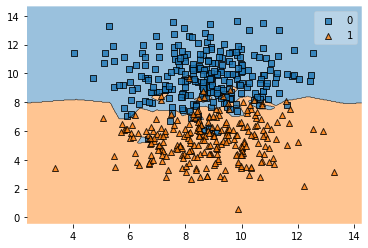

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[["w", "h"]].values, df["answer"].values, clf=clf)

> 分類モデルの境界線は上記のようになります。